<a href="https://colab.research.google.com/github/ananditabodas/Turkish_Music_Emotion/blob/main/Turkish_Music_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About:**

There are four different classes of music emotions in the dataset: happy, sad, angry, and relax.

A total of 100 music pieces are determined for each class in the database to have an equal number of samples in each class. There are 400 samples in the original dataset as 30 seconds from each sample.

Dataset Source: http://archive.ics.uci.edu/dataset/862/turkish+music+emotion

In [1]:
import pandas as pd
import numpy as np
import re

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Acoustic Features.csv')
df.columns

Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12

In [3]:
df.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [4]:
#label encode class column
from sklearn.preprocessing import LabelEncoder
categories = ['relax', 'happy', 'sad', 'angry']
label_encoder = LabelEncoder()
numeric_categories = label_encoder.fit_transform(df['Class'])

In [5]:
#Train test split

from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = numeric_categories

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build a baseline model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [7]:
model_tests= [KNeighborsClassifier(n_neighbors=12), tree.DecisionTreeClassifier(),
              MLPClassifier( alpha=1e-5,max_iter=250, hidden_layer_sizes=(90, ), random_state=1),
              svm.SVC()]

In [8]:
for model in model_tests:
    print (model)
    model.fit(X_train, y_train)
    #y_pred= model.predict(X_test)
    print (model.score(X_test, y_test) )

KNeighborsClassifier(n_neighbors=12)
0.475
DecisionTreeClassifier()
0.6125
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,), max_iter=250,
              random_state=1)
0.3125
SVC()
0.4125


We'll be following the philosophy of Occam's Razor, so we start with the simplest solution first and iteratively add complex feature engineering and modeling.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Next, we will try scaling before building the baseline models and see if the accuracy increases.

In [67]:
model_tests2= [
    Pipeline([('scaler',StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=12)) ]),
    Pipeline([('scaler',MinMaxScaler()),
    ('model',KNeighborsClassifier(n_neighbors=12) )]),
               tree.DecisionTreeClassifier(),
    Pipeline([('scaler',StandardScaler()),
              ('model',MLPClassifier( alpha=1e-5,max_iter=250, hidden_layer_sizes=(90, ), random_state=1) )]),
    Pipeline([('scaler',MinMaxScaler()),
              ('model', MLPClassifier( alpha=1e-5,max_iter=250, hidden_layer_sizes=(90, ), random_state=1)) ]),
    Pipeline([('scaler',StandardScaler()),
              ('model',svm.SVC()) ]),
    Pipeline([('scaler',MinMaxScaler()),
              ('model',svm.SVC() )])]

In [20]:
for model in model_tests2:
    print (model)
    model.fit(X_train, y_train)
    #y_pred= model.predict(X_test)
    print (model.score(X_test, y_test) )

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=12))])
0.6375
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=12))])
0.5375
DecisionTreeClassifier()
0.6375
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))])
0.8
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
0.8125
Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC())])
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


All the accuracies shot up significantly after scaling.

Now let us look at the correlations between various features.

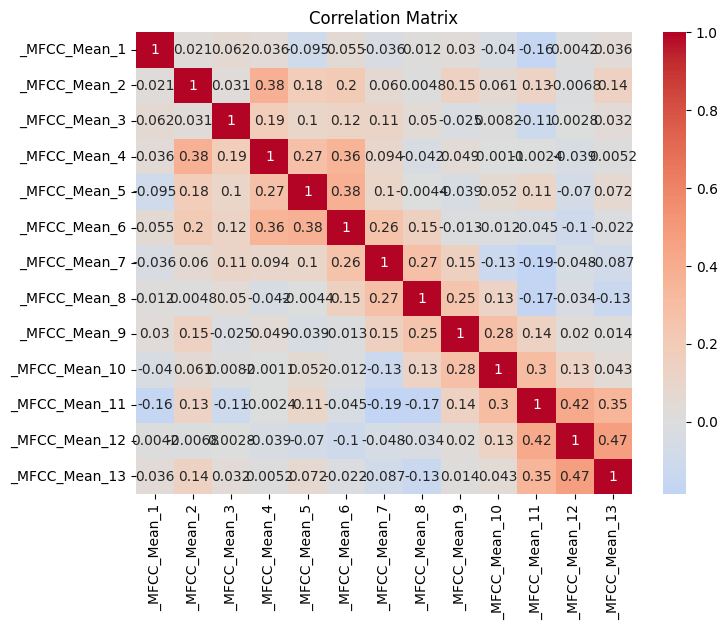

In [27]:
columns_with_prefix = [col for col in df.columns if col.startswith('_MFCC')]
a= df[columns_with_prefix].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(a, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

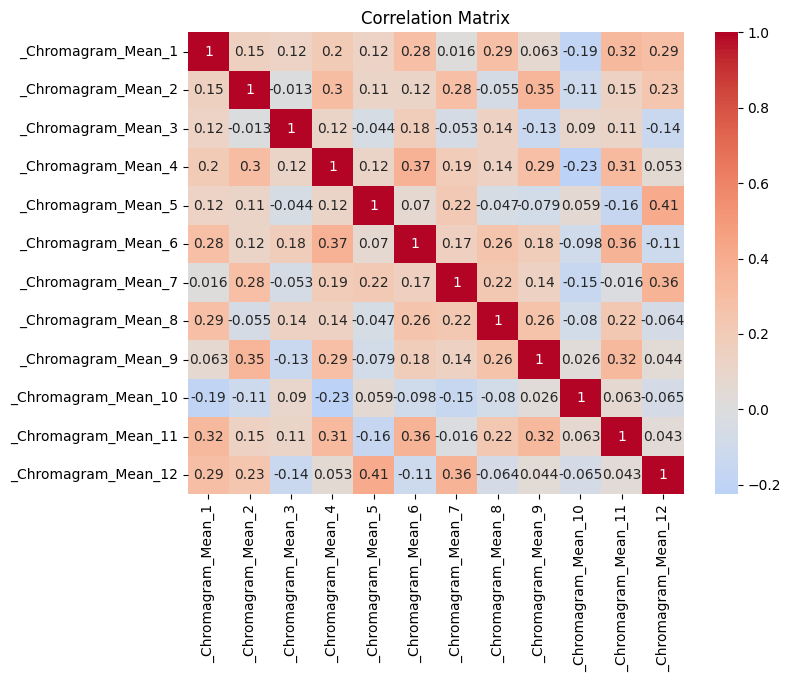

In [28]:
columns_with_prefix = [col for col in df.columns if col.startswith('_Chromag')]
a= df[columns_with_prefix].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(a, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

None of the similarly titled columns are highly correlated.

Our next step will be to understand feature importance.

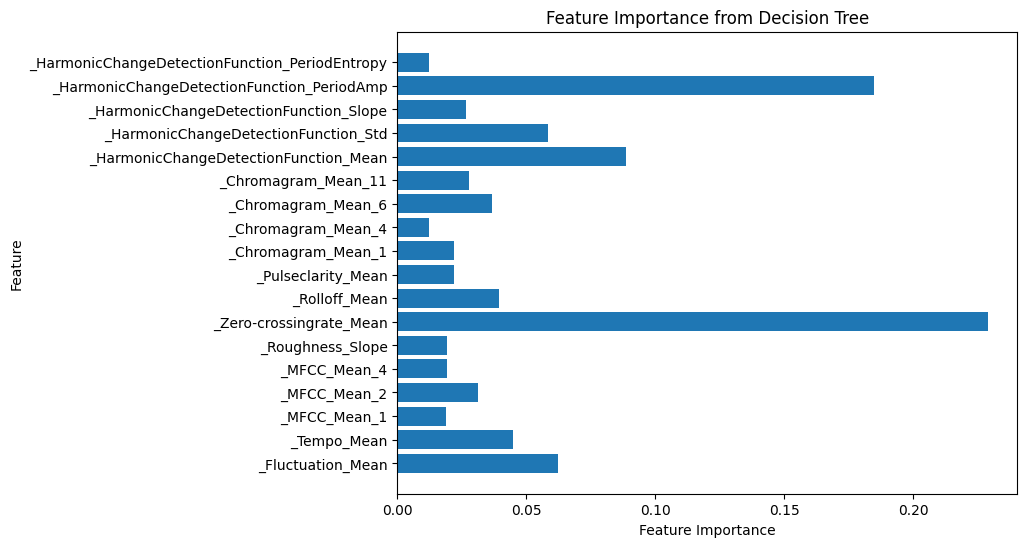

In [40]:
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_dict = dict(zip(feature_names, feature_importances))
filtered_importance_dict = {feature: importance for feature, importance in importance_dict.items() if importance > 0.01}


plt.figure(figsize=(8, 6))
#plt.barh(feature_names, feature_importances)
plt.barh(list(filtered_importance_dict.keys()), list(filtered_importance_dict.values()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.show()

Of the 60 odd features, only 18 of them seem to be contributing to the target variable.
Let us filter our features to only these, and then run the same models.

In [95]:
filtered_columns = list(filtered_importance_dict.keys())

In [96]:
for model in model_tests2:
    print (model)
    model.fit(X_train[filtered_columns], y_train)
    #y_pred= model.predict(X_test)
    print (model.score(X_test[filtered_columns], y_test) )

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=12))])
0.7
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=12))])
0.6625
DecisionTreeClassifier()
0.6375
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))])
0.8375
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
0.825
Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC())])
0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

print("Class Weights:", class_weights)

Class Weights: [0.97560976 0.97560976 1.08108108 0.97560976]


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

The class weights for each class are almost similar- which means that there's no significant imbalance in the training dataset.

Now let us consider dimensionality reduction.

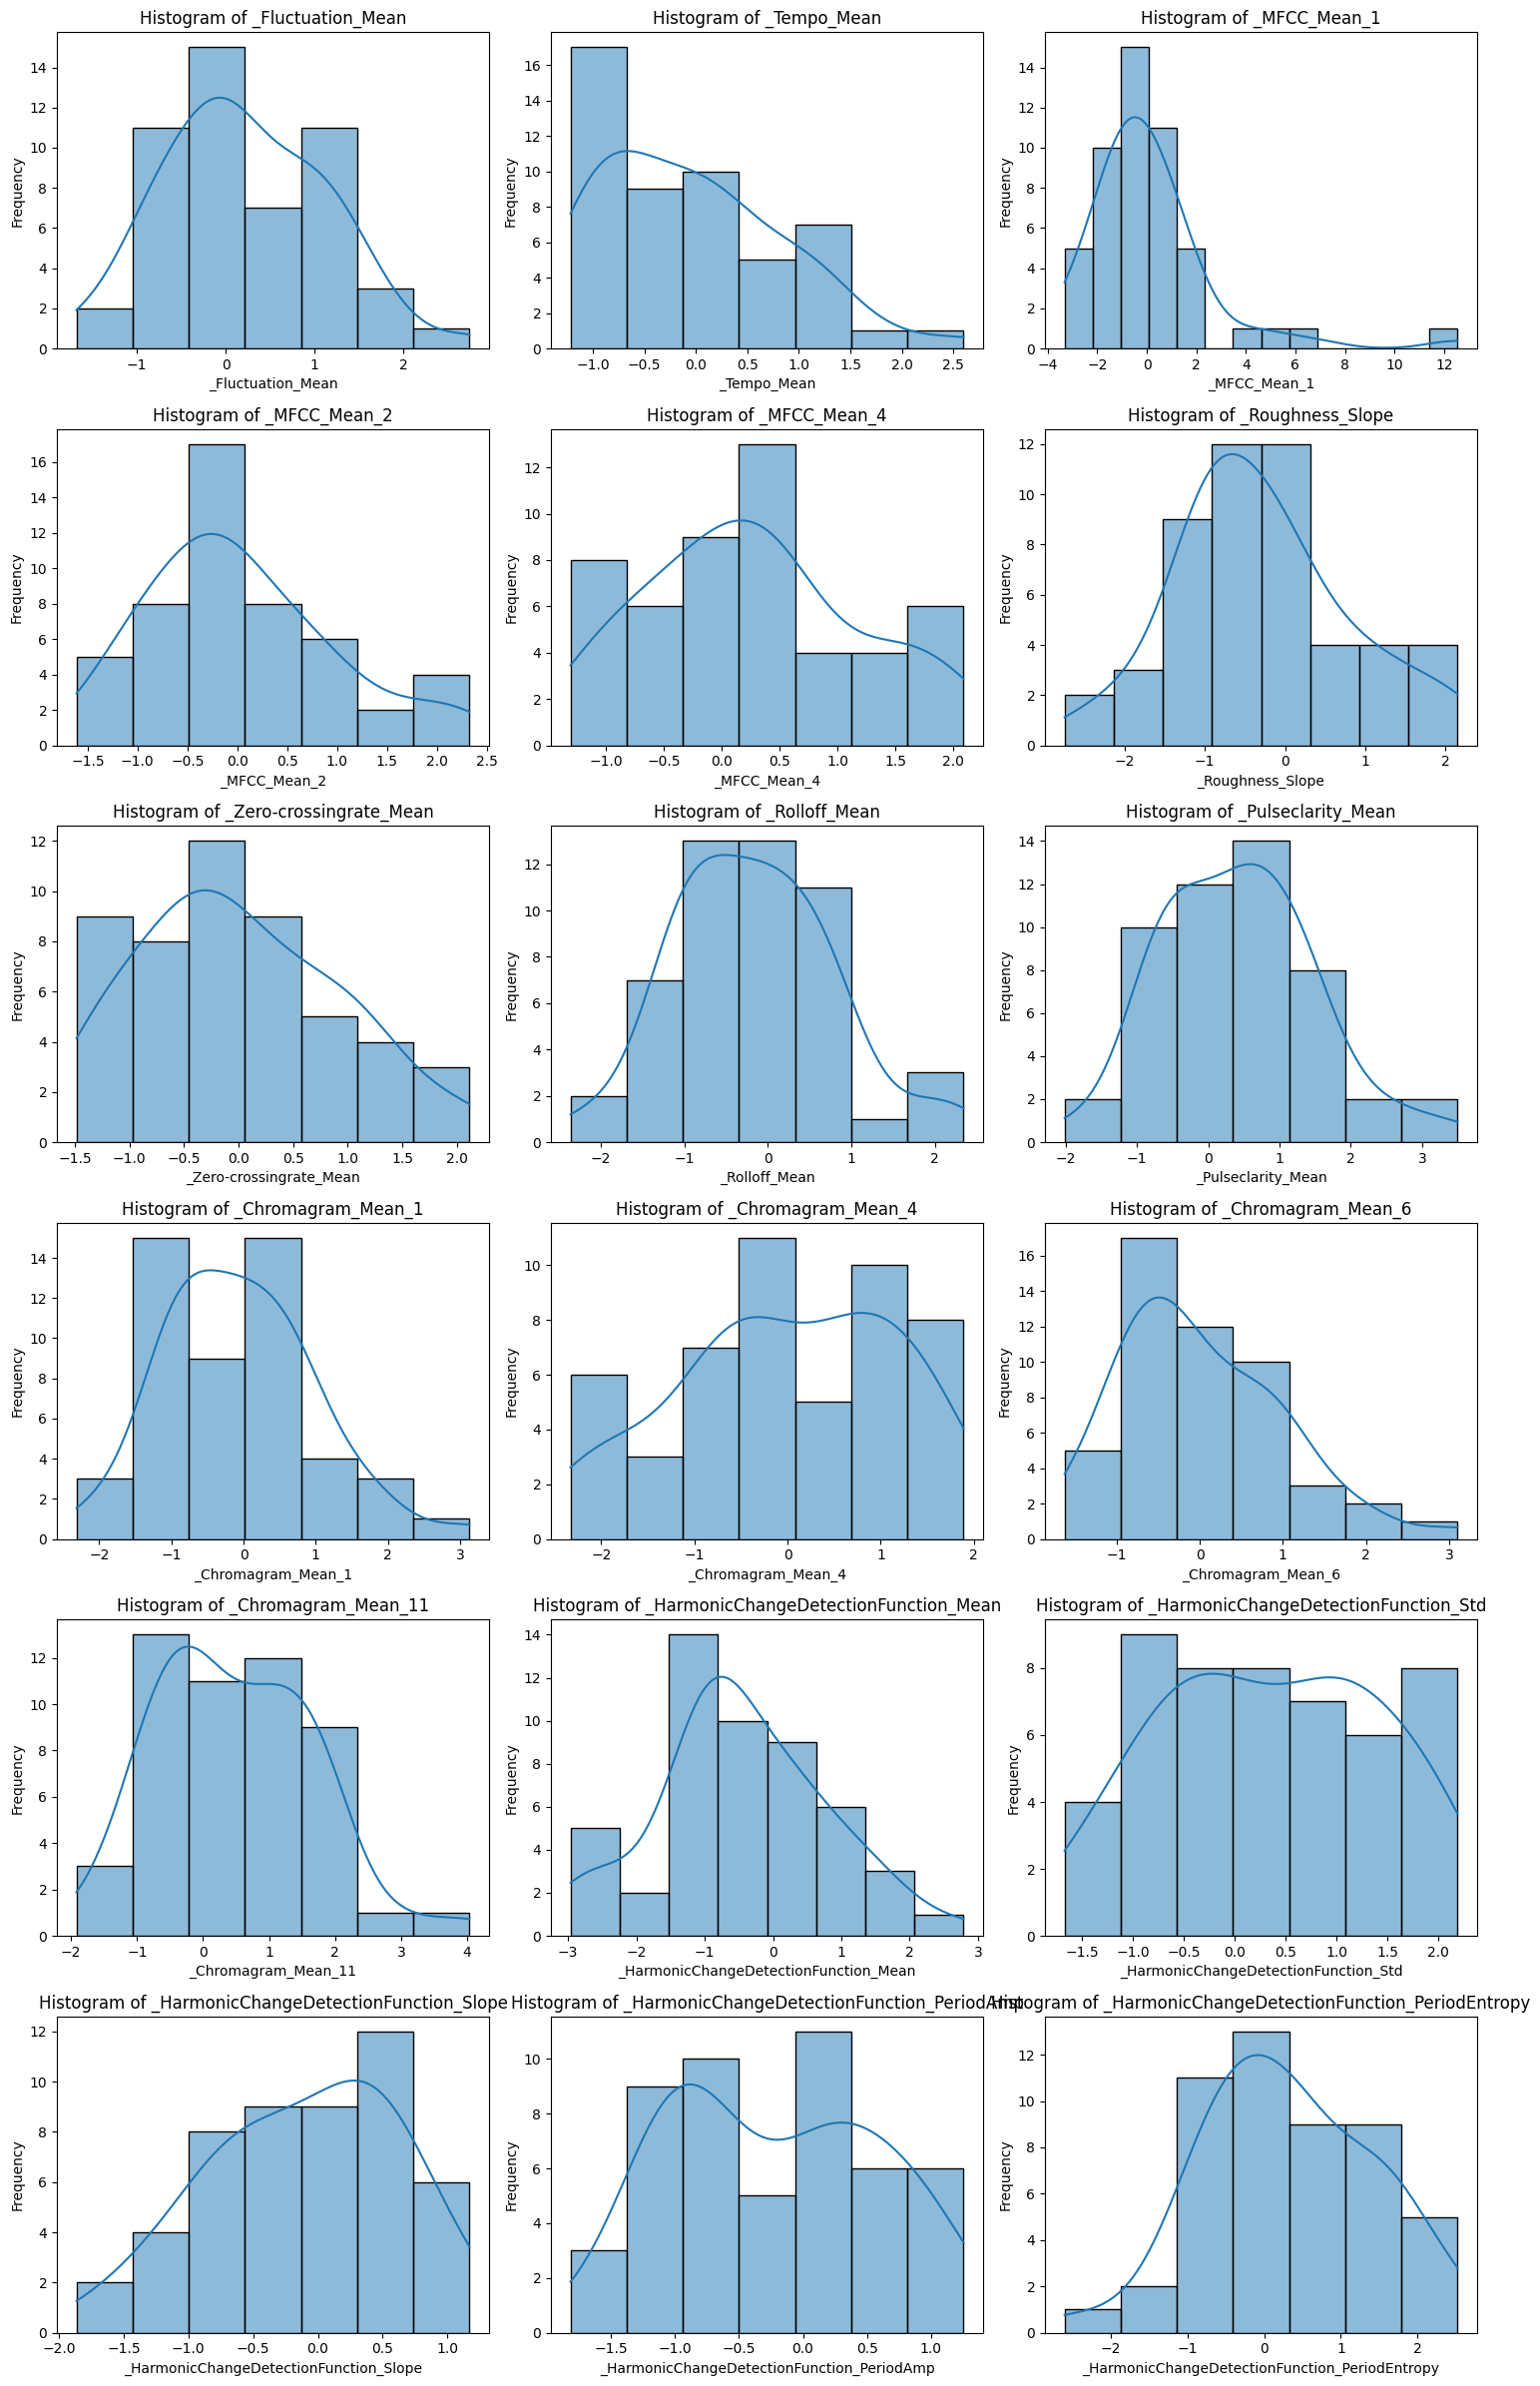

In [54]:
#check for normal distribution

num_cols = len(filtered_columns)
num_per_row = 3
num_rows = (num_cols + num_per_row - 1) // num_per_row

fig, axes = plt.subplots(num_rows, num_per_row, figsize=(15, 4*num_rows))

for idx, column in enumerate(filtered_columns):
    row = idx // num_per_row
    col = idx % num_per_row

    sns.histplot(X_train_scaled[idx], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Histogram of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

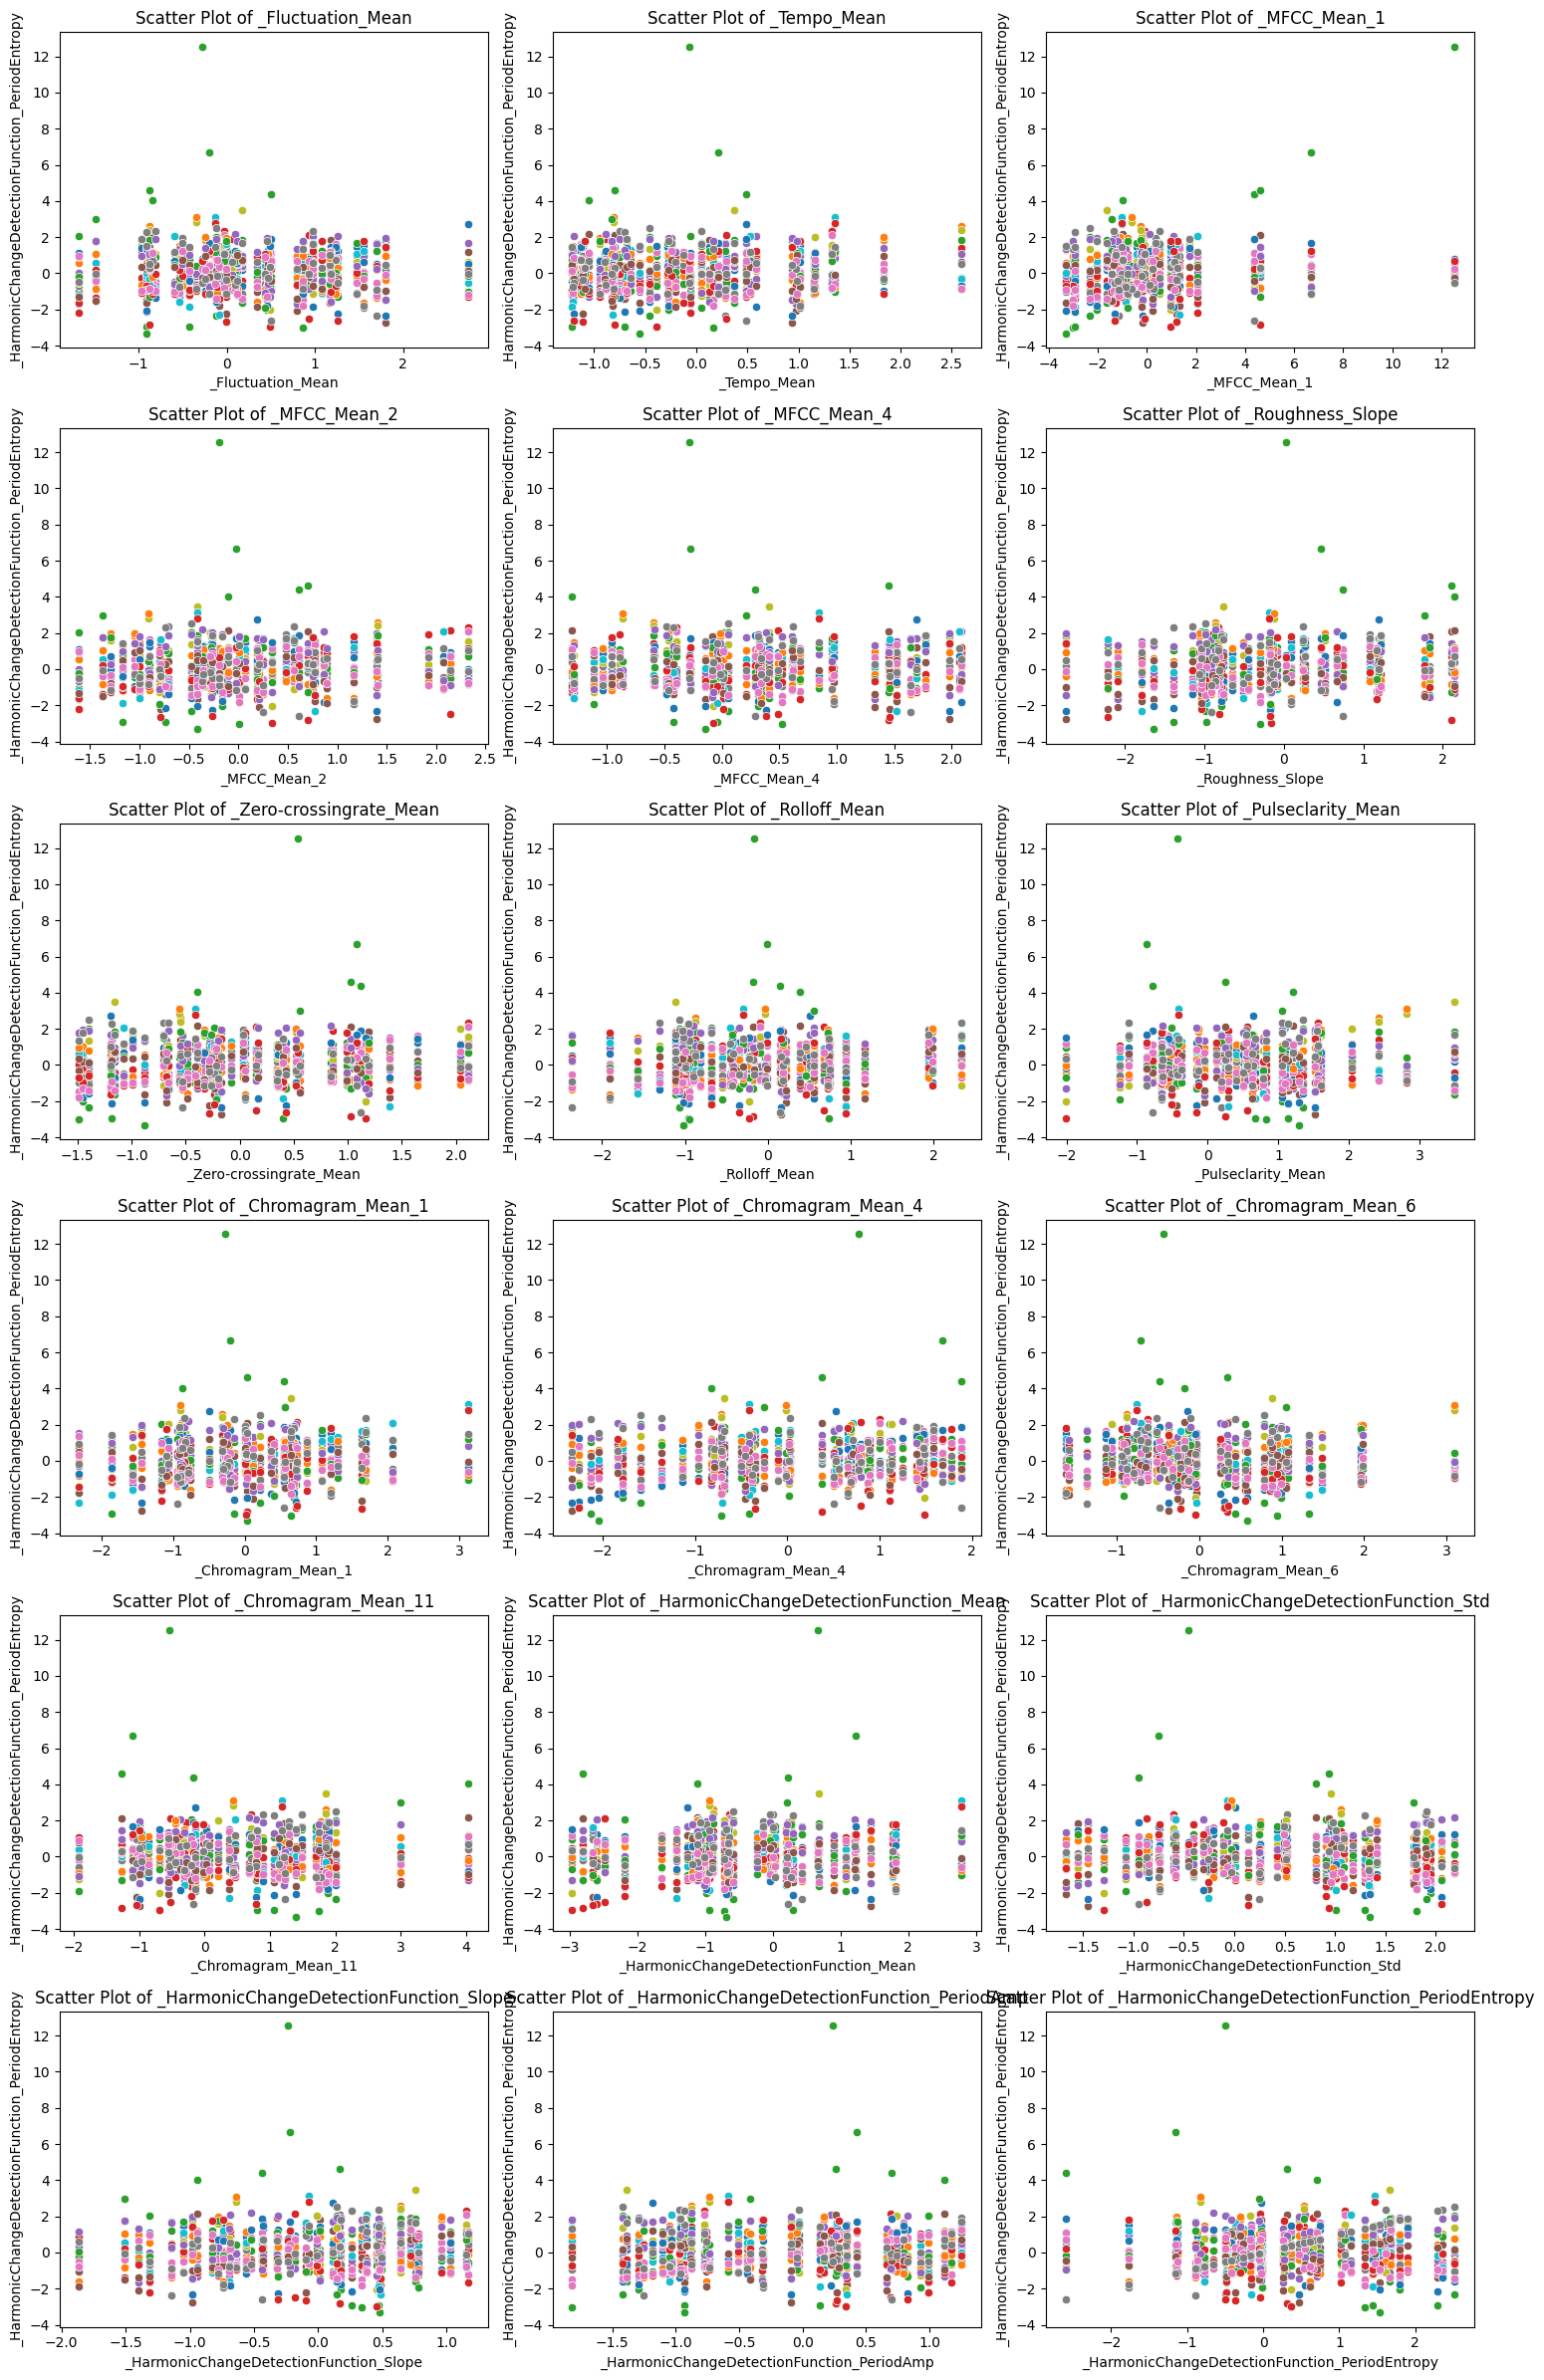

In [58]:
#check linear relationships between variables

num_features = len(filtered_columns)
features = filtered_columns
num_per_row = 3

num_rows = (num_features + num_per_row - 1) // num_per_row

fig, axes = plt.subplots(num_rows, num_per_row, figsize=(15, 4*num_rows))

for idx, feature in enumerate(features):

    for idx2, feature2 in enumerate(features):
        row = idx // num_per_row
        col = idx % num_per_row

        sns.scatterplot(x=X_train_scaled[idx], y=X_train_scaled[idx2],ax=axes[row, col])
        axes[row, col].set_title(f"Scatter Plot of {feature}")
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel(feature2)

plt.tight_layout()
plt.show()



Observations:
- Not all features are normally distributed, so LDA may not be an option.
- None of the features are linearly related, ie, PCA cannot be performed.

Let's see if the models are performing differently for different classes.

In [76]:
from sklearn.metrics import classification_report

In [77]:
for model in model_tests2:
    print (model)
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print (classification_report(y_test, y_pred))

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=12))])
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.59      0.89      0.71        18
           2       0.88      0.58      0.70        26
           3       0.70      0.39      0.50        18

    accuracy                           0.64        80
   macro avg       0.67      0.64      0.62        80
weighted avg       0.69      0.64      0.63        80

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=12))])
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        18
           1       0.60      1.00      0.75        18
           2       0.60      0.35      0.44        26
           3       0.33      0.22      0.27        18

    accuracy                           0.54        80
   macro avg     

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.85      0.94      0.89        18
           2       0.76      0.85      0.80        26
           3       0.65      0.61      0.63        18

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))])
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.81      0.94      0.87        18
           2       0.86      0.92      0.89        26
           3       0.69      0.61      0.65        18

    accuracy                           0.80        80
   macro avg       0.79      0.79  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Let us try hyperparameter tuning for the MLP classifier and the SVC Kernel:

In [80]:
model4= [Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))]) ,
Pipeline(steps=[('scaler', StandardScaler()), ('model', svm.SVC())]),

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', svm.SVC())]) ]


In [81]:
from sklearn.model_selection import GridSearchCV


In [ ]:
mlp_model= Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05,  random_state=1))])
param_grid = {
    'model__hidden_layer_sizes': [(100,2),(100,), (50, 50), (90,), (90,2)],
    'model__max_iter': [100,50,250, 300, 50]
}

grid_search = GridSearchCV(mlp_model, param_grid, cv=5)
grid_search.fit(X_train[filtered_columns], y_train)



In [105]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
test_accuracy = grid_search.score(X_test[filtered_columns], y_test)
print("Test Accuracy using Best Estimator:", test_accuracy)

Best Parameters: {'model__hidden_layer_sizes': (50, 50), 'model__max_iter': 300}
Best Accuracy: 0.796875
Test Accuracy using Best Estimator: 0.8125


In [102]:
svc_1=Pipeline(steps=[('scaler', MinMaxScaler()), ('model', svm.SVC())])
param_grid = {
    'model__degree': [3,5,7,12],
    'model__kernel': ['poly','linear','sigmoid']
}
grid_search = GridSearchCV(svc_1, param_grid, cv=5)
grid_search.fit(X_train[filtered_columns], y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
test_accuracy = grid_search.score(X_test[filtered_columns], y_test)
print("Test Accuracy using Best Estimator:", test_accuracy)

Best Parameters: {'model__degree': 3, 'model__kernel': 'linear'}
Best Accuracy: 0.759375
Test Accuracy using Best Estimator: 0.8125


In [108]:
dt= tree.DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini','entropy', 'log_loss'],
    'max_depth': [100, 50, 20,120],
    'min_samples_split':[1,3,5]
}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train[filtered_columns], y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
test_accuracy = grid_search.score(X_test[filtered_columns], y_test)
print("Test Accuracy using Best Estimator:", test_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 3}
Best Accuracy: 0.69375
Test Accuracy using Best Estimator: 0.6125


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

It doesn't look like the accuracy can be increased by hyperparameter tuning.

Let us turn to ensemble methods:

In [109]:
from sklearn.ensemble import VotingClassifier


In [123]:
p1= Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(90,),
                               max_iter=250, random_state=1))])

p2= Pipeline(steps=[('scaler', StandardScaler()), ('model', svm.SVC(probability=True))])

p3= Pipeline(steps=[('scaler', MinMaxScaler()), ('model', svm.SVC(probability=True))])

p4= tree.DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth= 100,min_samples_split= 3)

In [125]:
ensemble = VotingClassifier(estimators=[('p1',p1) ,('p3', p3), ('p4', p4)], voting='hard')
ensemble.fit(X_train[filtered_columns], y_train)

accuracy = ensemble.score(X_test[filtered_columns], y_test)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [126]:
from sklearn.ensemble import StackingClassifier


In [132]:
stacking_ensemble = StackingClassifier(estimators=[('p1',p1) ,('p3', p3), ('p4', p4)], final_estimator=p2)
stacking_ensemble.fit(X_train[filtered_columns], y_train)

accuracy = stacking_ensemble.score(X_test[filtered_columns], y_test)
print("Stacking Ensemble Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Stacking Ensemble Accuracy: 0.7875


**Conclusion:**

**The ensemble method of a Voting Classifier pulls up the accuracy to a good 85%.**
